In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np


In [2]:
import tensorflow as tf

2022-09-01 13:40:55.936197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nags205/.local/lib/python3.8/site-packages/cv2/../../lib64:/home/nags205/root/build/lib
2022-09-01 13:40:55.936242: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# library for data augmentation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [4]:
array_to_img = tf.keras.utils.array_to_img
img_to_array = tf.keras.utils.img_to_array

In [141]:
"""
DATADIR = "./dataset/kagglecatsanddogs_5340/PetImages/"
CATEGORIES = ["Dog", "Cat", "Dog_test", "Cat_test"]
IMG_SIZE = 56
training_data = []
"""
def create_training_data(DATADIR = "./dataset/kagglecatsanddogs_5340/PetImages/",
                        CATEGORIES = ["Dog", "Dog_test", "Cat", "Cat_test",
                                      "rhinoceros","rhinoceros_test", "stag", "stag"],
                        IMG_SIZE = 56,
                        training_data = []):
    img_train, label_train, img_test, label_test = [], [], [], []
    
    #set datagen function
    datagen = ImageDataGenerator(rotation_range=30, zoom_range=[0.95,1.05],
                                horizontal_flip=True, vertical_flip=True, brightness_range = [0.6, 0.8])
    
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name),)
                #image reading
                #Dog
                if class_num == 0:
                    img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    #resize the image
                    img_train.append(img_resize_array)
                    label_train.append(0)
                #Dog_test
                elif class_num == 1:
                    img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    #resize the image
                    img_test.append(img_resize_array)
                    label_test.append(0)
                #Cat
                elif class_num == 2:
                    img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    #resize the image
                    img_train.append(img_resize_array)
                    label_train.append(1)
                #Cat_test
                elif class_num == 3:
                    img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    #resize the image
                    img_test.append(img_resize_array)
                    label_test.append(1)
                #rhinoceros
                elif class_num == 4:
                    img_rhinoceros = img_array[np.newaxis, :, : ,:]
                    print(image_name, "/40")
                    for i, data in enumerate(datagen.flow(img_rhinoceros, batch_size = 1, seed = random.randint(1,10000))):
                        img_resize_array = cv2.resize(data[0], (IMG_SIZE, IMG_SIZE))
                        img_train.append(img_resize_array)
                        label_train.append(2)
                        if i == 250:
                            break
                            
                #rhinoceros_test
                elif class_num == 5:
                    print(image_name, "/10")
                    img_rhinoceros = img_array[np.newaxis, :, : ,:]
                    for i, data in enumerate(datagen.flow(img_rhinoceros, batch_size = 1, seed = random.randint(1,10000))):
                        img_resize_array = cv2.resize(data[0], (IMG_SIZE, IMG_SIZE))
                        img_test.append(img_resize_array)
                        label_test.append(2)
                        #print("augumentation")
                        if i == 250:
                            break
                
                
                # append data, label == 0 : dog, label == 1: cat, label == 2 : rhinoceros    
                
                #training_data.append([img_resize_array, class_num])
                #append image data, label info
            except Exception as e:
                pass
        
    img_train = np.array(img_train)
    label_train = np.array(label_train)
    img_test = np.array(img_test)
    label_test = np.array(label_test)
    
    return (img_train, label_train), (img_test, label_test)

In [83]:
#for x, y in enumerate(datagen.flow(img_train, batch_size = 1, seed = random.randint(1,10000))):
#    print('{0}:{1}'.format(x,y.shape))

0:(1, 56, 56, 3)
1:(1, 56, 56, 3)
2:(1, 56, 56, 3)
3:(1, 56, 56, 3)
4:(1, 56, 56, 3)
5:(1, 56, 56, 3)
6:(1, 56, 56, 3)
7:(1, 56, 56, 3)
8:(1, 56, 56, 3)
9:(1, 56, 56, 3)
10:(1, 56, 56, 3)
11:(1, 56, 56, 3)
12:(1, 56, 56, 3)
13:(1, 56, 56, 3)
14:(1, 56, 56, 3)
15:(1, 56, 56, 3)
16:(1, 56, 56, 3)
17:(1, 56, 56, 3)
18:(1, 56, 56, 3)
19:(1, 56, 56, 3)
20:(1, 56, 56, 3)
21:(1, 56, 56, 3)
22:(1, 56, 56, 3)
23:(1, 56, 56, 3)
24:(1, 56, 56, 3)
25:(1, 56, 56, 3)
26:(1, 56, 56, 3)
27:(1, 56, 56, 3)
28:(1, 56, 56, 3)
29:(1, 56, 56, 3)
30:(1, 56, 56, 3)
31:(1, 56, 56, 3)
32:(1, 56, 56, 3)
33:(1, 56, 56, 3)
34:(1, 56, 56, 3)
35:(1, 56, 56, 3)
36:(1, 56, 56, 3)
37:(1, 56, 56, 3)
38:(1, 56, 56, 3)
39:(1, 56, 56, 3)
40:(1, 56, 56, 3)
41:(1, 56, 56, 3)
42:(1, 56, 56, 3)
43:(1, 56, 56, 3)
44:(1, 56, 56, 3)
45:(1, 56, 56, 3)
46:(1, 56, 56, 3)
47:(1, 56, 56, 3)
48:(1, 56, 56, 3)
49:(1, 56, 56, 3)
50:(1, 56, 56, 3)
51:(1, 56, 56, 3)
52:(1, 56, 56, 3)
53:(1, 56, 56, 3)
54:(1, 56, 56, 3)
55:(1, 56, 56, 3)
56

KeyboardInterrupt: 

In [120]:
def show(datagen, img):
  #表示サイズを設定
  plt.figure(figsize = (10, 5))
  
  #画像をbatch_sizeの数ずつdataに入れる
  #本稿は画像が一枚のため同じ画像がdataに入り続けることになる
  for i, data in enumerate(datagen.flow(img, batch_size = 1, seed = random.randint(1,100000))):
    #表示のためnumpy配列からimgに変換する
    show_img = array_to_img(data[0], scale = False)
    #2×3の画像表示の枠を設定＋枠の指定
    plt.subplot(2, 3, i+1)
    #軸を表示しない
    plt.xticks(color = "None")
    plt.yticks(color = "None")
    plt.tick_params(bottom = False, left = False)
    #画像を表示
    plt.imshow(show_img)
    #6回目で繰り返しを強制的に終了
    if i == 5:
        return

In [143]:
datagen = ImageDataGenerator(rotation_range=180, zoom_range=[0.9,1.1],
                                horizontal_flip=True, vertical_flip=True)

In [144]:
(img_train, label_train), (img_test, label_test)=create_training_data()

Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


3.jpg /40
35.jpg /40
19.jpg /40
1.jpg /40
14.jpg /40
5.jpg /40
7.jpg /40
27.jpg /40
21.jpg /40
10.jpg /40
24.jpg /40
8.jpg /40
23.jpg /40
36.jpg /40
32.jpg /40
30.jpg /40
40.jpg /40
28.jpg /40
20.jpg /40
31.jpg /40
11.jpg /40
26.jpg /40
6.jpg /40
12.jpg /40
22.jpg /40
9.jpg /40
4.jpg /40
17.jpg /40
15.jpg /40
13.jpg /40
33.jpg /40
34.jpg /40
38.jpg /40
29.jpg /40
25.jpg /40
39.jpg /40
16.jpg /40
18.jpg /40
2.jpg /40
37.jpg /40
44.jpg /10
50.jpg /10
47.jpg /10
49.jpg /10
42.jpg /10
41.jpg /10
45.jpg /10
43.jpg /10
48.jpg /10
46.jpg /10


In [122]:
img_test.shape

(4727, 56, 56, 3)

In [123]:
img_test4 = img_test[np.newaxis, 2216, :, :, :]

In [124]:
img_test4.shape

(1, 56, 56, 3)

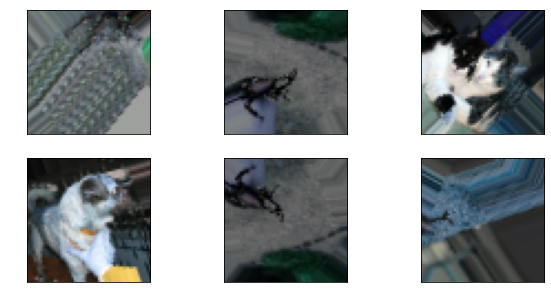

In [126]:
show(datagen, img_test)

In [127]:
class_names = ['dog', 'cat', 'beetle']

In [145]:
def plot_image(i, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('uint8'), cmap=plt.cm.binary)
    
    plt.xlabel("{}".format(class_names[true_label]))


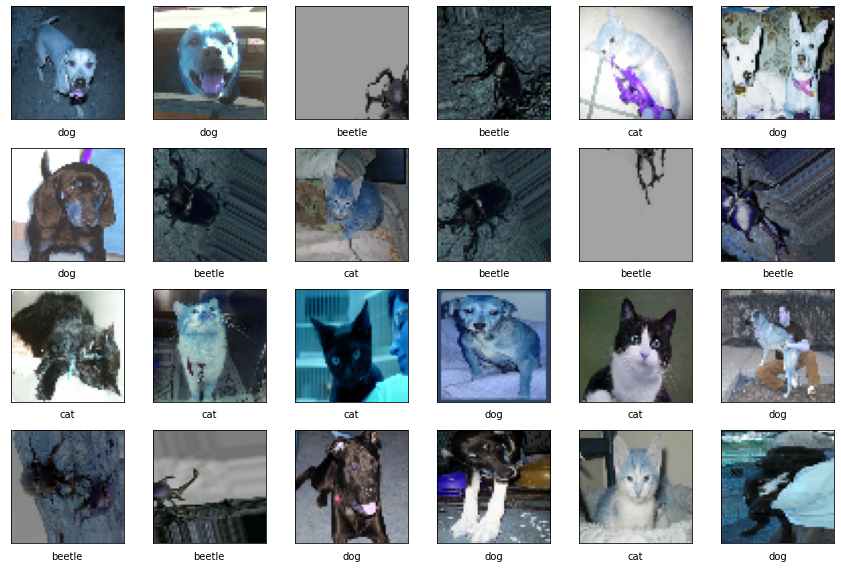

In [147]:
num_rows = 4
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))

batch_mask = np.random.choice(len(img_train), num_images)
img_batch = img_train[batch_mask]
label_batch = label_train[batch_mask]
#predictions_batch = predictions11[batch_mask]

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, label_batch, img_batch)
plt.tight_layout()
plt.show()